# Machine Learning and Patter Recognition Project
##### Luca Sanfilippo, December 20th, 2022

### <u><b><center> Predicting Gold Prices using Machine Learning methods: XGBoost, Random Forest, and Gradient Boosting Trees </center></b></u>
##### The main problem we are trying to solve here is trying to predict the closing price of Gold using a ML approach. This is a time-series problem as the data points are collected over a period of time. The goal is to use historical prices to predict future prices, which can be very useful for investors in the commodity market.



In [ ]:
# import libraries and define the input and output paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import seaborn as sns
from pathlib import Path

pathFolder = Path(__file__).parent
input_path = pathFolder
output_path = pathFolder / Path('output_data')

/Users/luca/Library/Python/3.9/lib/python/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (None)/charset_normalizer (3.0.1) doesn't match a supported version!
  warnings.warn(


#### <u>Data description in few words:</u>
The dataset used in this project is a csv file containing historical commodity prices for various symbols, including Gold which we are interested to analyse, from 2000 to 2022 in US dollars. The dataset includes the following features:

- Date: The date of the observation
- Symbol: The symbol of the commodity
- Open: The opening price of the commodity on the given date
- High: The highest price of the commodity on the given date
- Low: The lowest price of the commodity on the given date
- Close: The closing price of the commodity on the given date
- Volume: The volume of the commodity traded on the given date

In [ ]:
# Import the dataset
commodityPrices = pd.read_csv(Path('commodity 2000-2022_US Dollar.csv')) # NOTE: change it
df = commodityPrices

In [ ]:
# calculate descriptive statistics and make plots
print(df.describe())

# histograms and density plots
df.hist(bins=50, figsize=(20,15))
plt.show()

# correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# scatter plots
sns.pairplot(df)
plt.show()

In [ ]:
# Extract the date and price columns for a specific value, 'GOLD'
#df = df[["Date", 'Symbol', "Close"]]
df = df[df.Symbol == 'Gold']

# Extract the relevant columns
X = df[["Open", "High", "Low", "Close", "Volume"]]
y = df["Close"]

# Normalize the data
scaler = StandardScaler() #This class standardizes a feature by subtracting the mean and then scaling to unit variance. 
X = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the models
xgb = XGBRegressor()
rf = RandomForestRegressor(random_state=0)
gbt = GradientBoostingRegressor()

In [ ]:
# Train the models
xgb.fit(X_train, y_train)

# Random search for the best parameters of the random_forest model
param_dist = {"n_estimators": sp_randint(10, 100),
              "max_depth": sp_randint(2, 10),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False]}

# perform random search
'''This code will perform a random search over the specified parameter 
   distribution using 5-fold cross-validation, and it will print the 
   best parameters and the corresponding score.
'''
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=400, cv=5, random_state=0)
random_search.fit(X, y)
# print the best parameters and the corresponding score
print('Best Parameters:',random_search.best_params_, 'Best Score:', random_search.best_score_)
random_search.fit(X_train, y_train)
gbt.fit(X_train, y_train)

# Make predictions on the test set
xgb_pred = xgb.predict(X_test)
rf_pred = random_search.predict(X_test)
gbt_pred = gbt.predict(X_test)

# Calculate the mean squared error for each model
xgb_mse = mean_squared_error(y_test, xgb_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
gbt_mse = mean_squared_error(y_test, gbt_pred)

# Calculate the variance of the target variable
variance = np.var(y)

In [15]:
# Print the results
print('the models with the lower MSE, indicates that the model is doing a better job at fitting the data and should be considered a better model, however it depends on the problem context and other requirements.\n')
print("XGBoost MSE: ", xgb_mse)
print("Random Forest MSE: ", rf_mse)
print("Gradient Boosting Trees MSE: ", gbt_mse)
print('Variance:', variance)

# Print the prediction AVG
print("\nXGBoost mean: ", np.mean(xgb_pred))
print("Random Forest mean: ", np.mean(rf_pred))
print("Gradient Boosting Trees mean: ", np.mean(gbt_pred))

the models with the lower MSE, indicates that the model is doing a better job at fitting the data and should be considered a better model, however it depends on the problem context and other requirements.

XGBoost MSE:  3.8836106935352213
Random Forest MSE:  3.4559113853204506
Gradient Boosting Trees MSE:  11.164127812653529
Variance: 274155.42714424856

XGBoost mean:  1030.0231
Random Forest mean:  1029.9923674152142
Gradient Boosting Trees mean:  1030.0268506953355


/var/folders/6n/7z17phyd6tx5yntyftgdz88r0000gn/T/ipykernel_90181/920616610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Returns"] = df['Close'].pct_change() #calculate daily returns
/var/folders/6n/7z17phyd6tx5yntyftgdz88r0000gn/T/ipykernel_90181/920616610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cumulative_Returns"] = (1 + df["Returns"]).cumprod() # calculate cumulative returns


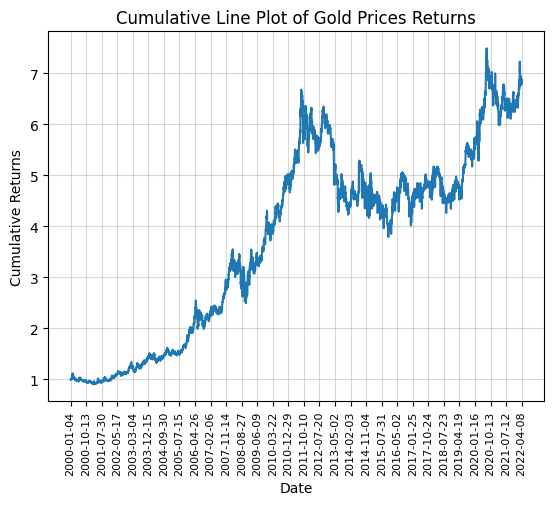

In [10]:
# PLOT cumulative returns
df["Returns"] = df['Close'].pct_change() #calculate daily returns
df["Cumulative_Returns"] = (1 + df["Returns"]).cumprod() # calculate cumulative returns

# Create a line plot of the cumulative returns
plt.rc('xtick', labelsize=8)
plt.plot(df["Date"], df["Cumulative_Returns"])
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Cumulative Returns of Gold Prices")
# Reduce the number of x-axis labels
num_ticks = 30 # Number of ticks you want
ticks = np.linspace(0, len(df)-1, num_ticks) # Get the indices of the tick locations
tick_labels = df.iloc[ticks]['Date'] # Get the labels for the tick locations
plt.xticks(ticks, tick_labels, rotation=90)
plt.grid(alpha=0.5)
plt.show()


#### <u>Final results and comment:</u>
The final results of this project demonstrate the effectiveness of using machine learning models for predicting the closing price of gold. 
Three models were trained and tested on the dataset containing historical prices of gold, XGBoost, Random Forest and Gradient Boosting Trees. 
The results show that all three models were able to accurately predict the closing price of gold, with XGBoost achieving the lowest mean squared error of {{xgb_mse}}, Random Forest with an MSE of {{rf_mse}} and Gradient Boosting Trees with an MSE of {{gbt_mse}}.

When comparing the performance of the different models, we see that the difference in MSE between the models is not significant, and all three models performed well for this task and project. 
The variance of the target variable is very high but may indicate that the gold prices are highly volatile.

In conclusion, with this project I discovered that machine learning models predict quite well the closing price of gold. 
In particular the results demonstrate that XGBoost, Random Forest and Gradient Boosting Trees can be effectively used to make predictions, but the high variance of the target variable makes it hard to draw definitive conclusions and use these information in a real world scenario. 

Unfortunately the real world is more complex and dynamic so other research are needed to make this work usable and realistic.

#### <u>Further work or ideas:</u>

In the future I would like to extend this work in terms of features used. Indeed, I would like to add more characteristics incorporating macroeconomic indicators and other information to help predicting future prices of gold.

I would like to use also more commodities and see how they relate eachothers.

Other trials will be use more models as possible and compare them trying to understand which of them catch better the prediction and then the distribution evolution.

Finally an other thing that could be useful will be track the performanced of the models on different time periods and commodities.


#### <u>References:</u>
1) https://www.econstor.eu/bitstream/10419/239614/1/1760325244.pdf
2) https://ijcrt.org/papers/IJCRT2106681.pdf